# [DataEngConf SF '17](http://www.dataengconf.com) | _pandas_ Workshop (Track 3)

## What is _pandas_?

> ### "You can think of _pandas_ as a Numpy "on steroids" with a focus on real-world data. It  encapsulates and wraps around much of the low-level functionality of numpy, scipy and matplotlib, exposing it to the end-user in a much friendlier way."
>
> (Source: [Brief introduction to the Python stack for scientific computing](https://github.com/pysal/notebooks/blob/master/notebooks/intro_scicomp_python.ipynb))

<img src='assets/pandas-logo.png'>

## _pandas_ in the Python Ecosystem

<img src='assets/pandas-ecosystem.png'>

## Setup

- You will need to install the Jupyter Notebook, _pandas_, and Matplotlib installed to work on the workshop notebooks.  The Anaconda Distribution has all three built in:  http://continium.io/downloads.

In [1]:
import numpy as np # import NumPy in the np namespace (convention; just follow it!)
import pandas as pd # import pandas in the pd namespace (another convention; follow it too!)

pd.set_option('display.max_rows', 10) # limit printing DataFrames to 10 rows

import matplotlib.pyplot as plt # import Matplotlib as plt (convention, ...)

# have the plots be inserted directly in the Jupyter notebooks
%matplotlib inline

## DataFrames

- A `DataFrame` is a labeled 2-dimensional array and is the most commonly used _pandas_ object.

<img src='assets/dataframe.png'>

- Let's demonstrate some basic _pandas_' `DataFrame` capabilities through a fruits example.

In [2]:
fruits = pd.read_csv('data/small_fruits.csv', index_col='fruit') # use pandas to read the CSV file

In [3]:
fruits # "print" the DataFrame to the console

,carbohydrates,proteins,fats,fiber,water
fruit,,,,,
Apple,13.8,0.3,0.2,2.4,85.6
Banana,22.8,1.1,0.3,2.6,74.9
Cantaloupe,8.2,0.8,0.2,0.9,90.2
Date,75.0,1.8,0.2,6.7,21.3
Elderberry,11.4,0.7,0.5,7.0,79.8
...,...,...,...,...,...
Quince,15.3,0.4,0.1,1.9,83.8
Raspberry,11.9,1.2,0.7,6.5,85.7
Strawberry,7.7,0.7,0.3,2.0,91.0


In [4]:
type(fruits) # return the class of the fruits object: a DataFrame

pandas.core.frame.DataFrame

In [5]:
len(fruits) # return the number of rows in the dataset

19

In [6]:
fruits.shape # return a tuple with the number of rows and columns in the dataset

(19, 5)

### `.columns`, `.index`, and `.values`

In [7]:
fruits.columns # return the labels of the columns

Index([u'carbohydrates', u'proteins', u'fats', u'fiber', u'water'], dtype='object')

In [8]:
fruits.index # return the labels of the rows

Index([u'Apple', u'Banana', u'Cantaloupe', u'Date', u'Elderberry', u'Fig',
       u'Guava', u'Honeydew', u'Kiwi', u'Lemon', u'Mango', u'Nectarine',
       u'Orange', u'Peach', u'Quince', u'Raspberry', u'Strawberry',
       u'Tangerine', u'Watermelon'],
      dtype='object', name=u'fruit')

In [9]:
fruits.values # return the 2D array (unlabeled)

array([[ 13.8,   0.3,   0.2,   2.4,  85.6],
       [ 22.8,   1.1,   0.3,   2.6,  74.9],
       [  8.2,   0.8,   0.2,   0.9,  90.2],
       [ 75. ,   1.8,   0.2,   6.7,  21.3],
       [ 11.4,   0.7,   0.5,   7. ,  79.8],
       [ 19.2,   0.8,   0.3,   2.9,  79.1],
       [ 14.3,   2.6,   1. ,   5.4,  80.8],
       [  9.1,   0.5,   0.1,   0.8,  89.8],
       [ 14.2,   1.2,   0.6,   2. ,  83.2],
       [  9.3,   1.1,   0.3,   2.8,  89. ],
       [ 15. ,   0.8,   0.4,   1.6,  83.5],
       [ 10.6,   1.1,   0.3,   1.7,  87.6],
       [ 11.5,   0.7,   0.2,   2.4,  87.1],
       [  9.5,   0.9,   0.3,   1.5,  88.9],
       [ 15.3,   0.4,   0.1,   1.9,  83.8],
       [ 11.9,   1.2,   0.7,   6.5,  85.7],
       [  7.7,   0.7,   0.3,   2. ,  91. ],
       [ 13.3,   0.8,   0.3,   1.8,  85.2],
       [  7.6,   0.6,   0.2,   0.4,  91.5]])

In [10]:
type(fruits.values) # note that the 2D array is a NumPy array

numpy.ndarray

### Subsetting `DataFrame`s

#### Along columns with `[]`

In [11]:
fruits[['carbohydrates', 'proteins', 'fats']] # pass a list of row labels within []

,carbohydrates,proteins,fats
fruit,,,
Apple,13.8,0.3,0.2
Banana,22.8,1.1,0.3
Cantaloupe,8.2,0.8,0.2
Date,75.0,1.8,0.2
Elderberry,11.4,0.7,0.5
...,...,...,...
Quince,15.3,0.4,0.1
Raspberry,11.9,1.2,0.7
Strawberry,7.7,0.7,0.3


In [12]:
type(fruits[['carbohydrates', 'proteins', 'fats']]) # subsetting 3 columns returns a DataFrame

pandas.core.frame.DataFrame

- This subset is also a `DataFrame`.  This enables us to perform further `DataFrame`s operations on it as needed.

#### Along rows and columns with `.loc[]`:

In [13]:
fruits.loc[['Apple', 'Orange']] # pass a list of row labels within .loc[]

,carbohydrates,proteins,fats,fiber,water
fruit,,,,,
Apple,13.8,0.3,0.2,2.4,85.6
Orange,11.5,0.7,0.2,2.4,87.1


In [14]:
fruits.loc[:, ['carbohydrates', 'proteins', 'fats']] # accepts a second argument for subsetting columns

,carbohydrates,proteins,fats
fruit,,,
Apple,13.8,0.3,0.2
Banana,22.8,1.1,0.3
Cantaloupe,8.2,0.8,0.2
Date,75.0,1.8,0.2
Elderberry,11.4,0.7,0.5
...,...,...,...
Quince,15.3,0.4,0.1
Raspberry,11.9,1.2,0.7
Strawberry,7.7,0.7,0.3


In [15]:
fruits.loc[['Apple', 'Orange'], ['carbohydrates', 'proteins', 'fats']] # use both arguments to select rows and columns

,carbohydrates,proteins,fats
fruit,,,
Apple,13.8,0.3,0.2
Orange,11.5,0.7,0.2


In [16]:
fruits.loc['Apple':'Cantaloupe', :'fats'] # ranges of labels instead of list of labels

,carbohydrates,proteins,fats
fruit,,,
Apple,13.8,0.3,0.2
Banana,22.8,1.1,0.3
Cantaloupe,8.2,0.8,0.2


### Aside: Transposing `DataFrame`s

In [17]:
fruits.T # swap rows and columns

fruit,Apple,Banana,Cantaloupe,Date,Elderberry,Fig,Guava,Honeydew,Kiwi,Lemon,Mango,Nectarine,Orange,Peach,Quince,Raspberry,Strawberry,Tangerine,Watermelon
carbohydrates,13.8,22.8,8.2,75.0,11.4,19.2,14.3,9.1,14.2,9.3,15.0,10.6,11.5,9.5,15.3,11.9,7.7,13.3,7.6
proteins,0.3,1.1,0.8,1.8,0.7,0.8,2.6,0.5,1.2,1.1,0.8,1.1,0.7,0.9,0.4,1.2,0.7,0.8,0.6
fats,0.2,0.3,0.2,0.2,0.5,0.3,1.0,0.1,0.6,0.3,0.4,0.3,0.2,0.3,0.1,0.7,0.3,0.3,0.2
fiber,2.4,2.6,0.9,6.7,7.0,2.9,5.4,0.8,2.0,2.8,1.6,1.7,2.4,1.5,1.9,6.5,2.0,1.8,0.4
water,85.6,74.9,90.2,21.3,79.8,79.1,80.8,89.8,83.2,89.0,83.5,87.6,87.1,88.9,83.8,85.7,91.0,85.2,91.5


In [18]:
fruits.T.shape # number of rows and numbers of columns are swapped

(5, 19)

## Series

A `Series` is a labeled 1-dimensional array and is the second most commonly used _pandas_ object.

<img src='assets/series.png'>

- Subsetting a `DataFrame` on a single row or a single column returns a `Series`.

In [19]:
fruits['fiber'] # select the column named "fiber"

fruit
Apple         2.4
Banana        2.6
Cantaloupe    0.9
Date          6.7
Elderberry    7.0
             ... 
Quince        1.9
Raspberry     6.5
Strawberry    2.0
Tangerine     1.8
Watermelon    0.4
Name: fiber, dtype: float64

In [20]:
type(fruits['fiber']) # this column is a Series

pandas.core.series.Series

In [21]:
fruits.loc['Apple'] # select the row named "Apple"

carbohydrates    13.8
proteins          0.3
fats              0.2
fiber             2.4
water            85.6
Name: Apple, dtype: float64

In [22]:
type(fruits.loc['Apple']) # this row is also a Series

pandas.core.series.Series

In [23]:
fruits.fiber # columns of DataFrames are also available as properties

# (note: names can't have spaces nor special characters)

fruit
Apple         2.4
Banana        2.6
Cantaloupe    0.9
Date          6.7
Elderberry    7.0
             ... 
Quince        1.9
Raspberry     6.5
Strawberry    2.0
Tangerine     1.8
Watermelon    0.4
Name: fiber, dtype: float64

- `Series` are one-dimensional but don't have a specific direction:

In [24]:
fruits.loc['Guava'].shape

(5,)

In [25]:
fruits.loc['Guava'].T.shape # the shape doesn't change when transposing a Series

(5,)

### Subsetting `Series`

In [26]:
water = fruits.water

In [27]:
water['Apple':'Cantaloupe'] # with the [] notation

fruit
Apple         85.6
Banana        74.9
Cantaloupe    90.2
Name: water, dtype: float64

In [28]:
type(water['Apple':'Cantaloupe']) # 2+ elements are returned as a Series

pandas.core.series.Series

In [29]:
water['Apple'] # with the [] notation

85.599999999999994

In [30]:
water.Apple # the same using a property

85.599999999999994

In [31]:
type(water.Apple) # a scalar is not returned as a Series

numpy.float64

### Performing operations on `DataFrame`s and `Series`

#### Question: Which fruit(s) are less than 50% water?  What is their water content?

In [32]:
fruits[fruits.water < 50][['water']]

,water
fruit,
Date,21.3


#### Question: How many calories do carbohydrates, proteins, and fats contribute in one serving of each fruit?

In [33]:
calories = fruits.loc[:, 'carbohydrates':'fats'] * [4., 4., 9.]

calories

,carbohydrates,proteins,fats
fruit,,,
Apple,55.2,1.2,1.8
Banana,91.2,4.4,2.7
Cantaloupe,32.8,3.2,1.8
Date,300.0,7.2,1.8
Elderberry,45.6,2.8,4.5
...,...,...,...
Quince,61.2,1.6,0.9
Raspberry,47.6,4.8,6.3
Strawberry,30.8,2.8,2.7


#### Question: How many calories are in one serving of each fruit?

In [34]:
energy = calories.sum(axis=1)

energy

fruit
Apple          58.2
Banana         98.3
Cantaloupe     37.8
Date          309.0
Elderberry     52.9
              ...  
Quince         63.7
Raspberry      58.7
Strawberry     36.3
Tangerine      59.1
Watermelon     34.6
dtype: float64

#### Question: Which fruit has the most calories in one serving?  How many?

In [35]:
energy.sort_values(ascending=False).head(1)

fruit
Date    309.0
dtype: float64

#### Question: How many servings of each fruit would add to 1000 calories?  Sort them in increasing order.

In [36]:
(1000 / energy).sort_values()

fruit
Date           3.236246
Banana        10.172940
Fig           12.091898
Guava         13.054830
Kiwi          14.925373
                ...    
Peach         22.573363
Honeydew      25.445293
Cantaloupe    26.455026
Strawberry    27.548209
Watermelon    28.901734
dtype: float64

#### Question: What is the carbohydrates, proteins, and fats calorie contribution (in %) in one serving of each fruit?

In [37]:
calories_contribution = 100. * calories.divide(energy, axis=0)

calories_contribution

,carbohydrates,proteins,fats
fruit,,,
Apple,94.845361,2.061856,3.092784
Banana,92.777213,4.476094,2.746694
Cantaloupe,86.772487,8.465608,4.761905
Date,97.087379,2.330097,0.582524
Elderberry,86.200378,5.293006,8.506616
...,...,...,...
Quince,96.075353,2.511774,1.412873
Raspberry,81.090290,8.177172,10.732538
Strawberry,84.848485,7.713499,7.438017


#### Question: Which 5 fruits have the lowest fats calorie contribution (in one serving)?

In [38]:
calories_contribution['fats'].sort_values().head(5)

fruit
Date        0.582524
Quince      1.412873
Honeydew    2.290076
Banana      2.746694
Apple       3.092784
Name: fats, dtype: float64

In [39]:
(fruits.apply(lambda row: 100. * 9. * row.fats /
                 (4. * row.carbohydrates + 4. * row.proteins + 9. * row.fats), axis=1)
    .sort_values()
    .head(5))

fruit
Date        0.582524
Quince      1.412873
Honeydew    2.290076
Banana      2.746694
Apple       3.092784
dtype: float64

#### Question: Which fruits have "berry" in their names?

In [40]:
berry = fruits.index.str.contains('berry', case=False)

fruits.index[berry]

Index([u'Elderberry', u'Raspberry', u'Strawberry'], dtype='object', name=u'fruit')

#### Question: How many calories per serving do they have on average?

In [41]:
energy[berry].mean()

49.300000000000004

#### Question: Which "berry" fruit has the lowest calorie count per serving?

In [42]:
energy[berry].sort_values().index[0]

'Strawberry'

#### Question: Add the energy count `Series` as a new column (with label `energy`) to the `fruits` `DataFrame`.

In [43]:
fruits['energy'] = energy

fruits

,carbohydrates,proteins,fats,fiber,water,energy
fruit,,,,,,
Apple,13.8,0.3,0.2,2.4,85.6,58.2
Banana,22.8,1.1,0.3,2.6,74.9,98.3
Cantaloupe,8.2,0.8,0.2,0.9,90.2,37.8
Date,75.0,1.8,0.2,6.7,21.3,309.0
Elderberry,11.4,0.7,0.5,7.0,79.8,52.9
...,...,...,...,...,...,...
Quince,15.3,0.4,0.1,1.9,83.8,63.7
Raspberry,11.9,1.2,0.7,6.5,85.7,58.7
Strawberry,7.7,0.7,0.3,2.0,91.0,36.3


In [44]:
fruits.to_csv('fruits-with-energy.csv')

## The "Play Tennis" Dataset<sup>(*)</sup>

<sup>(*)</sup> The "play tennis" dataset is a famous toy example in machine learning.

In [45]:
tennis = pd.read_csv('data/play_tennis.csv')

In [46]:
tennis

,date,outlook,temp,humidity,wind,play
0,2014-04-23,sunny,29,high,weak,no
1,2014-07-12,sunny,32,high,strong,no
2,2014-08-21,overcast,27,high,weak,yes
3,2014-10-12,rainy,20,high,weak,yes
4,2014-12-21,rainy,11,normal,weak,yes
...,...,...,...,...,...,...
9,2016-03-01,rainy,18,normal,weak,yes
10,2016-05-11,sunny,15,normal,strong,yes
11,2016-07-04,overcast,16,high,strong,yes
12,2016-11-21,overcast,29,normal,weak,yes


#### Question: What values does the `play` takes?

In [47]:
tennis.play.unique()

array(['no', 'yes'], dtype=object)

#### Question: How often did the players play vs. didn't play?

In [48]:
tennis.play.value_counts(dropna=False)

yes    9
no     5
Name: play, dtype: int64

#### Question: For the variable `play`, convert `no` to `False` and `yes` to `True`.

In [49]:
tennis.play = (tennis.play == 'yes')

#### Question: Can you do a similar convertion for `wind`?  Also rename that variable `windy`.  How about `humidity` and `outlook`?

In [50]:
tennis.wind.unique()

array(['weak', 'strong'], dtype=object)

In [51]:
tennis.wind = tennis.wind.map({'weak': False, 'strong': True})

tennis.rename(columns={'wind': 'windy'}, inplace=True)

In [52]:
tennis.humidity.unique()

array(['high', 'normal'], dtype=object)

In [53]:
tennis['high_humidity'] = tennis.humidity.map({'normal': False, 'high': True})

tennis.drop('humidity', axis=1, inplace=True)

In [54]:
tennis.outlook.unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

#### Question: What are the different play outcomes as a function of the `outlook`?

In [55]:
pd.crosstab(tennis.outlook, tennis.play)

play,False,True
outlook,,
overcast,0,4
rainy,2,3
sunny,3,2


## `GroupBy`

<img src='assets/groupby.png'>

(Source: datapandas.com)

In [56]:
df = pd.DataFrame({'key': list('ABC') * 3, 'value': [0, 5, 10, 5, 10, 15, 10, 15, 20]})

In [57]:
df

,key,value
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [58]:
df.groupby('key').sum()

,value
key,
A,15
B,30
C,45


#### Question: Redo the question above (what are the different play outcomes as a function of the `outlook`?) using `groupby`

In [59]:
(tennis.groupby('outlook')
    .play.aggregate({False: lambda play: sum(~play), True: lambda play: sum(play)}))

,False,True
outlook,,
overcast,0,4
rainy,2,3
sunny,3,2


#### Question: What is the average temperature per `outlook`?

In [60]:
tennis.groupby('outlook').temp.aggregate(lambda temp: temp.mean())

outlook
overcast    21.75
rainy       16.60
sunny       23.80
Name: temp, dtype: float64

In [61]:
tennis.groupby('outlook').temp.mean()

outlook
overcast    21.75
rainy       16.60
sunny       23.80
Name: temp, dtype: float64

#### Question: What is the min/max temperatures per `outlook`?

In [62]:
minmax = tennis.groupby('outlook').temp.aggregate(['min', 'max'])

minmax

,min,max
outlook,,
overcast,15,29
rainy,11,20
sunny,15,32


### `.merge()`

In [63]:
fruits = pd.read_csv('data/small_fruits.csv')

fruits.head(3)

,fruit,carbohydrates,proteins,fats,fiber,water
0,Apple,13.8,0.3,0.2,2.4,85.6
1,Banana,22.8,1.1,0.3,2.6,74.9
2,Cantaloupe,8.2,0.8,0.2,0.9,90.2


In [64]:
fruits_cont = pd.read_csv('data/small_fruits_cont.csv')

fruits_cont.tail(3)

,fruit,A,B1,B2,B3,C
16,Cantaloupe,3382.0,0.04,0.02,0.73,36.7
17,Banana,64.0,0.03,0.07,0.67,8.7
18,Apple,54.0,0.02,0.03,0.09,4.6


#### Question: Perform a LEFT join between `fruits` (left) and `fruits_cont` (right) on the fruit column

In [65]:
pd.merge(fruits, fruits_cont, how='left', on='fruit') # left join operation on fruit column

,fruit,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
0,Apple,13.8,0.3,0.2,2.4,85.6,54.0,0.02,0.03,0.09,4.6
1,Banana,22.8,1.1,0.3,2.6,74.9,64.0,0.03,0.07,0.67,8.7
2,Cantaloupe,8.2,0.8,0.2,0.9,90.2,3382.0,0.04,0.02,0.73,36.7
3,Date,75.0,1.8,0.2,6.7,21.3,149.0,0.05,0.06,1.61,0.0
4,Elderberry,11.4,0.7,0.5,7.0,79.8,NaN,0.07,0.06,1.92,29.0
...,...,...,...,...,...,...,...,...,...,...,...
14,Quince,15.3,0.4,0.1,1.9,83.8,40.0,0.02,0.03,0.20,15.0
15,Raspberry,11.9,1.2,0.7,6.5,85.7,33.0,0.03,0.04,0.60,26.2
16,Strawberry,7.7,0.7,0.3,2.0,91.0,12.0,0.02,0.02,0.39,58.9
17,Tangerine,13.3,0.8,0.3,1.8,85.2,681.0,0.06,0.04,0.38,26.7


#### Question: Reload `fruits` and `fruits_cont` and set the column `fruit` as index

In [66]:
fruits = pd.read_csv('data/small_fruits.csv', index_col='fruit')
fruits_cont = pd.read_csv('data/small_fruits_cont.csv', index_col='fruit')

In [67]:
fruits.head()

,carbohydrates,proteins,fats,fiber,water
fruit,,,,,
Apple,13.8,0.3,0.2,2.4,85.6
Banana,22.8,1.1,0.3,2.6,74.9
Cantaloupe,8.2,0.8,0.2,0.9,90.2
Date,75.0,1.8,0.2,6.7,21.3
Elderberry,11.4,0.7,0.5,7.0,79.8


In [68]:
fruits_cont.head()

,A,B1,B2,B3,C
fruit,,,,,
Watermelon,569.0,0.03,0.02,0.18,8.1
Tangerine,681.0,0.06,0.04,0.38,26.7
Strawberry,12.0,0.02,0.02,0.39,58.9
Raspberry,33.0,0.03,0.04,0.60,26.2
Quince,40.0,0.02,0.03,0.20,15.0


#### Question: Perform a new LEFT join between `fruits` (left) and `fruits_cont` (right) on the `index`

In [69]:
df = pd.merge(fruits, fruits_cont, left_index=True, right_index=True, how='left') # left join operation on (fruit) index

df

,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
fruit,,,,,,,,,,
Apple,13.8,0.3,0.2,2.4,85.6,54.0,0.02,0.03,0.09,4.6
Banana,22.8,1.1,0.3,2.6,74.9,64.0,0.03,0.07,0.67,8.7
Cantaloupe,8.2,0.8,0.2,0.9,90.2,3382.0,0.04,0.02,0.73,36.7
Date,75.0,1.8,0.2,6.7,21.3,149.0,0.05,0.06,1.61,0.0
Elderberry,11.4,0.7,0.5,7.0,79.8,NaN,0.07,0.06,1.92,29.0
...,...,...,...,...,...,...,...,...,...,...
Quince,15.3,0.4,0.1,1.9,83.8,40.0,0.02,0.03,0.20,15.0
Raspberry,11.9,1.2,0.7,6.5,85.7,33.0,0.03,0.04,0.60,26.2
Strawberry,7.7,0.7,0.3,2.0,91.0,12.0,0.02,0.02,0.39,58.9


### `.concat()`

In [70]:
fruits = pd.read_csv('data/small_fruits.csv')
fruits_cont = pd.read_csv('data/small_fruits_cont.csv')

In [71]:
pd.concat([fruits, fruits_cont], axis=1) # DON'T!!! (see fruit columns)

,fruit,carbohydrates,proteins,fats,fiber,water,fruit,A,B1,B2,B3,C
0,Apple,13.8,0.3,0.2,2.4,85.6,Watermelon,569.0,0.03,0.02,0.18,8.1
1,Banana,22.8,1.1,0.3,2.6,74.9,Tangerine,681.0,0.06,0.04,0.38,26.7
2,Cantaloupe,8.2,0.8,0.2,0.9,90.2,Strawberry,12.0,0.02,0.02,0.39,58.9
3,Date,75.0,1.8,0.2,6.7,21.3,Raspberry,33.0,0.03,0.04,0.60,26.2
4,Elderberry,11.4,0.7,0.5,7.0,79.8,Quince,40.0,0.02,0.03,0.20,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14,Quince,15.3,0.4,0.1,1.9,83.8,Elderberry,NaN,0.07,0.06,1.92,29.0
15,Raspberry,11.9,1.2,0.7,6.5,85.7,Date,149.0,0.05,0.06,1.61,0.0
16,Strawberry,7.7,0.7,0.3,2.0,91.0,Cantaloupe,3382.0,0.04,0.02,0.73,36.7
17,Tangerine,13.3,0.8,0.3,1.8,85.2,Banana,64.0,0.03,0.07,0.67,8.7


In [72]:
fruits = pd.read_csv('data/small_fruits.csv', index_col='fruit')
fruits_cont = pd.read_csv('data/small_fruits_cont.csv', index_col='fruit')

#### Question: Concatenate the `fruits` and `fruits_cont` `DataFrame`s horizontally (add columns; keep rows as-is) into a new `fruits` `DataFrame`

In [73]:
fruits = pd.concat([fruits, fruits_cont], axis=1)

fruits

,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
Apple,13.8,0.3,0.2,2.4,85.6,54.0,0.02,0.03,0.09,4.6
Banana,22.8,1.1,0.3,2.6,74.9,64.0,0.03,0.07,0.67,8.7
Cantaloupe,8.2,0.8,0.2,0.9,90.2,3382.0,0.04,0.02,0.73,36.7
Date,75.0,1.8,0.2,6.7,21.3,149.0,0.05,0.06,1.61,0.0
Elderberry,11.4,0.7,0.5,7.0,79.8,NaN,0.07,0.06,1.92,29.0
...,...,...,...,...,...,...,...,...,...,...
Raspberry,11.9,1.2,0.7,6.5,85.7,33.0,0.03,0.04,0.60,26.2
Strawberry,7.7,0.7,0.3,2.0,91.0,12.0,0.02,0.02,0.39,58.9
Tangerine,13.3,0.8,0.3,1.8,85.2,681.0,0.06,0.04,0.38,26.7
Watermelon,7.6,0.6,0.2,0.4,91.5,569.0,0.03,0.02,0.18,8.1


In [74]:
more_fruits = pd.read_csv('data/more_fruits.csv', index_col='fruit')

In [75]:
more_fruits

,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
fruit,,,,,,,,,,
Apricot,11.1,1.4,0.4,2,86.4,1926,0.03,0.04,0.6,10.0
Avocado,8.6,2.0,15.4,6.8,72.3,147,0.08,0.14,1.91,8.8
Blackberry,9.6,1.4,0.5,5.3,88.2,214,0.02,0.03,0.65,21.0
Blueberry,14.5,0.7,0.3,2.4,84.2,54,0.04,0.04,0.42,9.7
Casaba,6.6,1.1,0.1,0.9,91.9,0,0.02,0.03,0.23,21.8
...,...,...,...,...,...,...,...,...,...,...
Plum,11.4,0.7,0.3,1.4,87.2,345,0.03,0.03,0.42,9.5
Prickly pear,6.0,0.7,0.5,3.6,87.6,-,0.01,0.06,0.46,14.0
Raisin,78.5,2.5,0.5,6.8,16.6,0,0.11,0.18,1.11,5.4


#### Question: Concatenate the new `fruits` and `more_fruits` `DataFrame`s vertically (add rows; keep columns as-is)

In [76]:
fruits = pd.concat([fruits, more_fruits], axis=0)

fruits

,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
Apple,13.8,0.3,0.2,2.4,85.6,54,0.02,0.03,0.09,4.6
Banana,22.8,1.1,0.3,2.6,74.9,64,0.03,0.07,0.67,8.7
Cantaloupe,8.2,0.8,0.2,0.9,90.2,3382,0.04,0.02,0.73,36.7
Date,75.0,1.8,0.2,6.7,21.3,149,0.05,0.06,1.61,0.0
Elderberry,11.4,0.7,0.5,7,79.8,NaN,0.07,0.06,1.92,29.0
...,...,...,...,...,...,...,...,...,...,...
Plum,11.4,0.7,0.3,1.4,87.2,345,0.03,0.03,0.42,9.5
Prickly pear,6.0,0.7,0.5,3.6,87.6,-,0.01,0.06,0.46,14.0
Raisin,78.5,2.5,0.5,6.8,16.6,0,0.11,0.18,1.11,5.4
Rhubarb,4.5,0.9,0.2,1.8,93.6,102,0.02,0.03,0.3,8.0


#### Question: Set the name of the index as `name`.

In [77]:
fruits.index.rename('name', inplace=True)

In [78]:
fruits

,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
name,,,,,,,,,,
Apple,13.8,0.3,0.2,2.4,85.6,54,0.02,0.03,0.09,4.6
Banana,22.8,1.1,0.3,2.6,74.9,64,0.03,0.07,0.67,8.7
Cantaloupe,8.2,0.8,0.2,0.9,90.2,3382,0.04,0.02,0.73,36.7
Date,75.0,1.8,0.2,6.7,21.3,149,0.05,0.06,1.61,0.0
Elderberry,11.4,0.7,0.5,7,79.8,NaN,0.07,0.06,1.92,29.0
...,...,...,...,...,...,...,...,...,...,...
Plum,11.4,0.7,0.3,1.4,87.2,345,0.03,0.03,0.42,9.5
Prickly pear,6.0,0.7,0.5,3.6,87.6,-,0.01,0.06,0.46,14.0
Raisin,78.5,2.5,0.5,6.8,16.6,0,0.11,0.18,1.11,5.4


#### Question: Reorder the rows by alphabetical order of the fruits.

In [79]:
fruits.sort_index(inplace=True)

fruits

,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
name,,,,,,,,,,
Apple,13.8,0.3,0.2,2.4,85.6,54,0.02,0.03,0.09,4.6
Apricot,11.1,1.4,0.4,2,86.4,1926,0.03,0.04,0.6,10.0
Avocado,8.6,2.0,15.4,6.8,72.3,147,0.08,0.14,1.91,8.8
Banana,22.8,1.1,0.3,2.6,74.9,64,0.03,0.07,0.67,8.7
Blackberry,9.6,1.4,0.5,5.3,88.2,214,0.02,0.03,0.65,21.0
...,...,...,...,...,...,...,...,...,...,...
Rose hips,8.6,0.6,0.5,6.1,83.4,-,-0.06,0.07,0.5,840.0
Strawberry,7.7,0.7,0.3,2,91,12,0.02,0.02,0.39,58.9
Tangerine,13.3,0.8,0.3,1.8,85.2,681,0.06,0.04,0.38,26.7


## Handling Missing Data

- Missing values are represented using `np.nan` (NumPy's Not-A-Number)

In [80]:
fruits_cont = pd.read_csv('data/small_fruits_cont.csv', index_col='fruit')

fruits_cont

,A,B1,B2,B3,C
fruit,,,,,
Watermelon,569.0,0.03,0.02,0.18,8.1
Tangerine,681.0,0.06,0.04,0.38,26.7
Strawberry,12.0,0.02,0.02,0.39,58.9
Raspberry,33.0,0.03,0.04,0.60,26.2
Quince,40.0,0.02,0.03,0.20,15.0
...,...,...,...,...,...
Elderberry,NaN,0.07,0.06,1.92,29.0
Date,149.0,0.05,0.06,1.61,0.0
Cantaloupe,3382.0,0.04,0.02,0.73,36.7


#### Question: Are there any missing data in the `fruits_cont` `DataFrame`?

In [81]:
fruits_cont.isnull()

,A,B1,B2,B3,C
fruit,,,,,
Watermelon,False,False,False,False,False
Tangerine,False,False,False,False,False
Strawberry,False,False,False,False,False
Raspberry,False,False,False,False,False
Quince,False,False,False,False,False
...,...,...,...,...,...
Elderberry,True,False,False,False,False
Date,False,False,False,False,False
Cantaloupe,False,False,False,False,False


In [82]:
fruits_cont.isnull().sum() # by columns

A     1
B1    0
B2    0
B3    0
C     0
dtype: int64

In [83]:
fruits_cont.isnull().sum(axis=1) # by rows

fruit
Watermelon    0
Tangerine     0
Strawberry    0
Raspberry     0
Quince        0
             ..
Elderberry    1
Date          0
Cantaloupe    0
Banana        0
Apple         0
dtype: int64

### A couple of strategies to fil missing values

In [84]:
fruits_cont.fillna(0) # fill missing values using 0

,A,B1,B2,B3,C
fruit,,,,,
Watermelon,569.0,0.03,0.02,0.18,8.1
Tangerine,681.0,0.06,0.04,0.38,26.7
Strawberry,12.0,0.02,0.02,0.39,58.9
Raspberry,33.0,0.03,0.04,0.60,26.2
Quince,40.0,0.02,0.03,0.20,15.0
...,...,...,...,...,...
Elderberry,0.0,0.07,0.06,1.92,29.0
Date,149.0,0.05,0.06,1.61,0.0
Cantaloupe,3382.0,0.04,0.02,0.73,36.7


In [85]:
fruits_cont.mean()

A     436.611111
B1      0.040526
B2      0.036842
B3      1.142105
C      37.542105
dtype: float64

In [86]:
fruits_cont.fillna(fruits_cont.mean()) # replace missing values in columns with the mean value of these columns

,A,B1,B2,B3,C
fruit,,,,,
Watermelon,569.000000,0.03,0.02,0.18,8.1
Tangerine,681.000000,0.06,0.04,0.38,26.7
Strawberry,12.000000,0.02,0.02,0.39,58.9
Raspberry,33.000000,0.03,0.04,0.60,26.2
Quince,40.000000,0.02,0.03,0.20,15.0
...,...,...,...,...,...
Elderberry,436.611111,0.07,0.06,1.92,29.0
Date,149.000000,0.05,0.06,1.61,0.0
Cantaloupe,3382.000000,0.04,0.02,0.73,36.7


In [87]:
nuts = pd.read_csv('data/nuts.csv')

nuts

,type,name,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
0,Nuts,Acorn,40.8,6.2,23.9,-,27.9,39,0.11,0.12,1.80,0.0
1,Nuts,Almond,21.7,21.2,49.2,12.2,4.7,1,0.21,1.01,3.39,0.0
2,Nuts,Brazil,12.3,14.3,66.4,7.5,3.5,0,0.62,0.04,0.30,0.7
3,Nuts,Cashew,30.2,18.2,43.9,3.3,5.2,0,0.42,0.06,1.06,0.5
4,Nuts,Fresh,44.2,1.6,1.3,-,52.0,26,0.14,0.02,1.10,40.2
...,...,...,...,...,...,...,...,...,...,...,...,...
10,Nuts,Butter,21.6,24.1,50.0,8,1.1,0,0.11,0.11,13.70,0.0
11,Nuts,Pecan,13.9,9.1,71.8,9.6,3.5,56,0.66,0.13,1.17,1.1
12,Nuts,Pine,13.1,13.7,68.4,3.7,2.3,29,0.36,0.23,4.39,0.8
13,Nuts,Pistachio,27.5,20.3,45.4,10.3,3.9,415,0.87,0.16,1.30,5.6


#### Question: Are there any missing data in the `nuts` `DataFrame`?

In [88]:
nuts.isnull().sum().sum()

0

In [89]:
nuts = pd.read_csv('data/nuts.csv', na_values='-') # "-" are in fact missing values in the CSV file.  Tell pandas to treat them as such

In [90]:
nuts.isnull().sum().sum()

2

## Hierarchical Indexing

In [91]:
nuts = nuts.set_index(['type', 'name']) # the index is a combination of nuts' type and nuts' name

nuts

carbohydrates  proteins  fats  fiber  water    A    B1    B2  \
type name                                                                      
Nuts Acorn               40.8       6.2  23.9    NaN   27.9   39  0.11  0.12   
     Almond              21.7      21.2  49.2   12.2    4.7    1  0.21  1.01   
     Brazil              12.3      14.3  66.4    7.5    3.5    0  0.62  0.04   
     Cashew              30.2      18.2  43.9    3.3    5.2    0  0.42  0.06   
     Fresh               44.2       1.6   1.3    NaN   52.0   26  0.14  0.02   
...                       ...       ...   ...    ...    ...  ...   ...   ...   
     Butter              21.6      24.1  50.0    8.0    1.1    0  0.11  0.11   
     Pecan               13.9       9.1  71.8    9.6    3.5   56  0.66  0.13   
     Pine                13.1      13.7  68.4    3.7    2.3   29  0.36  0.23   
     Pistachio           27.5      20.3  45.4   10.3    3.9  415  0.87  0.16   
     Walnut              13.7      15.2  65.2    6.7    4.1   20  0.34  0.15   

                   B3     C  
type name                    
Nuts Acorn       1.80   0.0  
     Almond      3.39   0.0  
     Brazil      0.30   0.7  
     Cashew      1.06   0.5  
     Fresh       1.10  40.2  
...               ...   ...  
     Butter     13.70   0.0  
     Pecan       1.17   1.1  
     Pine        4.39   0.8  
     Pistachio   1.30   5.6  
     Walnut      1.15   1.3  

[15 rows x 10 columns]

In [92]:
nuts.loc[('Nuts', 'Acorn')] # access the row with index type='Nuts' and name='Acorn'

carbohydrates    40.80
proteins          6.20
fats             23.90
fiber              NaN
water            27.90
A                39.00
B1                0.11
B2                0.12
B3                1.80
C                 0.00
Name: (Nuts, Acorn), dtype: float64

In [93]:
fruits

,carbohydrates,proteins,fats,fiber,water,A,B1,B2,B3,C
name,,,,,,,,,,
Apple,13.8,0.3,0.2,2.4,85.6,54,0.02,0.03,0.09,4.6
Apricot,11.1,1.4,0.4,2,86.4,1926,0.03,0.04,0.6,10.0
Avocado,8.6,2.0,15.4,6.8,72.3,147,0.08,0.14,1.91,8.8
Banana,22.8,1.1,0.3,2.6,74.9,64,0.03,0.07,0.67,8.7
Blackberry,9.6,1.4,0.5,5.3,88.2,214,0.02,0.03,0.65,21.0
...,...,...,...,...,...,...,...,...,...,...
Rose hips,8.6,0.6,0.5,6.1,83.4,-,-0.06,0.07,0.5,840.0
Strawberry,7.7,0.7,0.3,2,91,12,0.02,0.02,0.39,58.9
Tangerine,13.3,0.8,0.3,1.8,85.2,681,0.06,0.04,0.38,26.7


#### Question: Add a `type` column to the `fruits` `DataFrame` with its value set to `Fruit`.

In [94]:
fruits['type'] = 'Fruit'

#### Question: Set the `fruits` `DataFrame` index with columns `type` and `name`.

In [95]:
fruits = fruits.reset_index().set_index(['type', 'name'])

#### Question: Concatenate the `fruits` and `nuts` vertically (add rows; keep columns as-is) into a new `DataFrame` called `food`

In [96]:
food = pd.concat([fruits, nuts], axis=0)

food

carbohydrates  proteins  fats fiber water     A    B1    B2  \
type  name                                                                      
Fruit Apple                13.8       0.3   0.2   2.4  85.6    54  0.02  0.03   
      Apricot              11.1       1.4   0.4     2  86.4  1926  0.03  0.04   
      Avocado               8.6       2.0  15.4   6.8  72.3   147  0.08  0.14   
      Banana               22.8       1.1   0.3   2.6  74.9    64  0.03  0.07   
      Blackberry            9.6       1.4   0.5   5.3  88.2   214  0.02  0.03   
...                         ...       ...   ...   ...   ...   ...   ...   ...   
Nuts  Butter               21.6      24.1    50     8   1.1     0  0.11  0.11   
      Pecan                13.9       9.1  71.8   9.6   3.5    56  0.66  0.13   
      Pine                 13.1      13.7  68.4   3.7   2.3    29  0.36  0.23   
      Pistachio            27.5      20.3  45.4  10.3   3.9   415  0.87  0.16   
      Walnut               13.7      15.2  65.2   6.7   4.1    20  0.34  0.15   

                    B3     C  
type  name                    
Fruit Apple       0.09   4.6  
      Apricot      0.6  10.0  
      Avocado     1.91   8.8  
      Banana      0.67   8.7  
      Blackberry  0.65  21.0  
...                ...   ...  
Nuts  Butter      13.7   0.0  
      Pecan       1.17   1.1  
      Pine        4.39   0.8  
      Pistachio    1.3   5.6  
      Walnut      1.15   1.3  

[61 rows x 10 columns]

#### Question: What is the average fat content of nuts?

In [97]:
food.loc['Nuts'].fats.mean()

47.286666666666662

## Plotting with _pandas_

- `DataFrame.plot()`
- `Series.plot()`

In [98]:
fruits = pd.read_csv('data/small_fruits.csv')

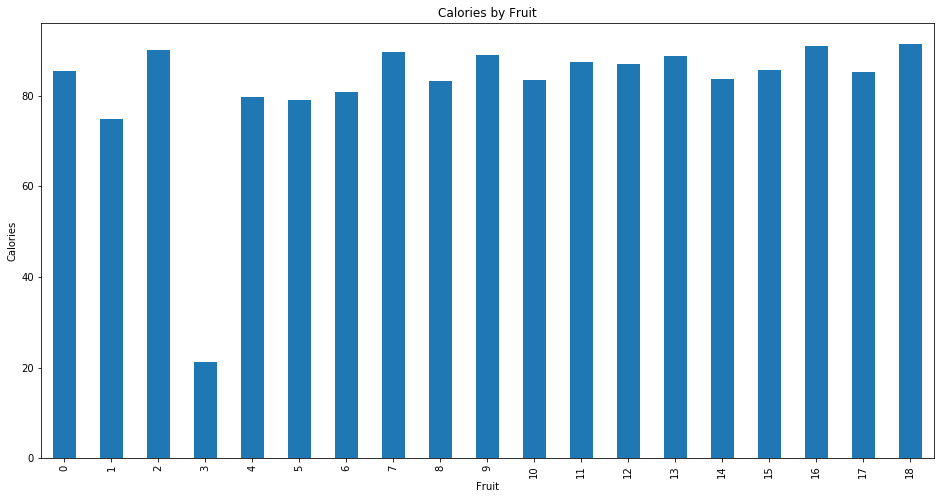

In [99]:
ax = fruits.water.plot(kind='bar', figsize=(16, 8), title='Calories by Fruit')
ax.set_xlabel('Fruit')
ax.set_ylabel('Calories')

#### Question: Modify the plot above to have the fruits listed from left to right by decreasing water

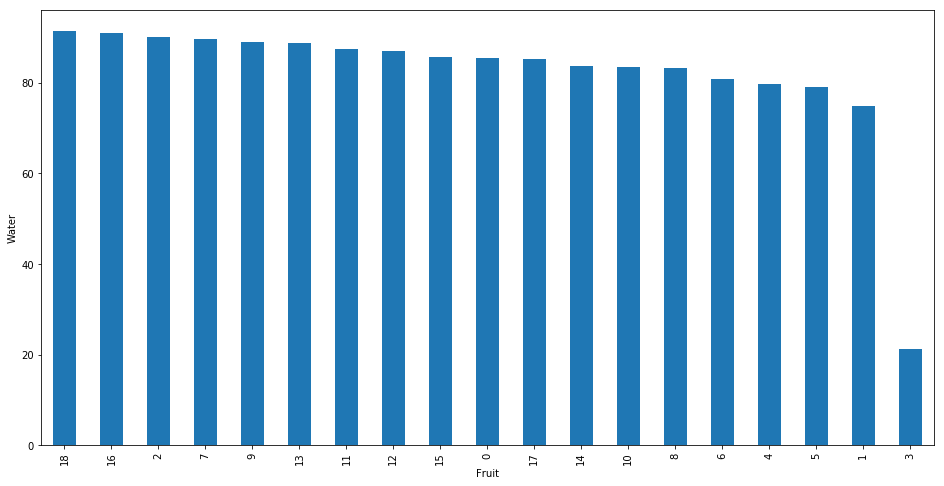

In [100]:
ax = (fruits.water.sort_values(ascending=False)
    .plot(kind='bar', figsize=(16, 8))) # sorted by decreasing energy
ax.set_xlabel('Fruit')
ax.set_ylabel('Water')

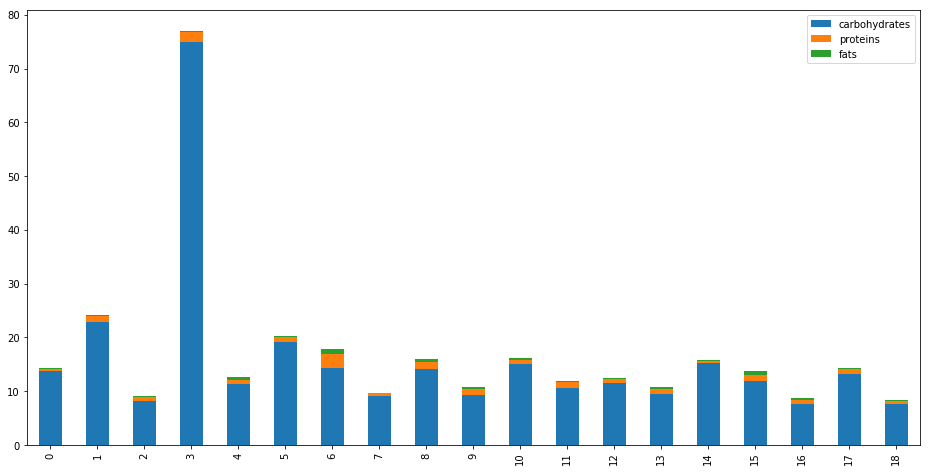

In [101]:
(fruits.loc[:, 'carbohydrates':'fats']
    .plot(kind='bar', stacked=True, figsize=(16, 8))) # unstacked (default)

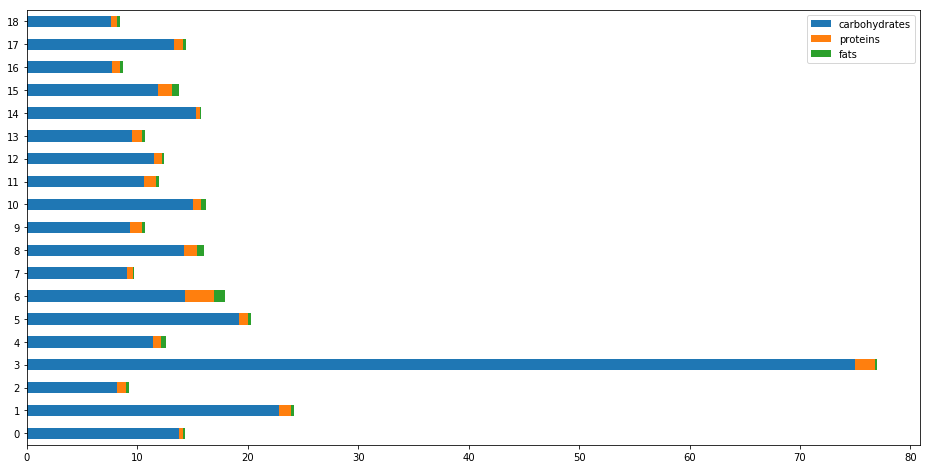

In [102]:
(fruits.loc[:, 'carbohydrates':'fats']
    .plot(kind='barh', stacked=True, figsize=(16, 8))) # unstacked (default)

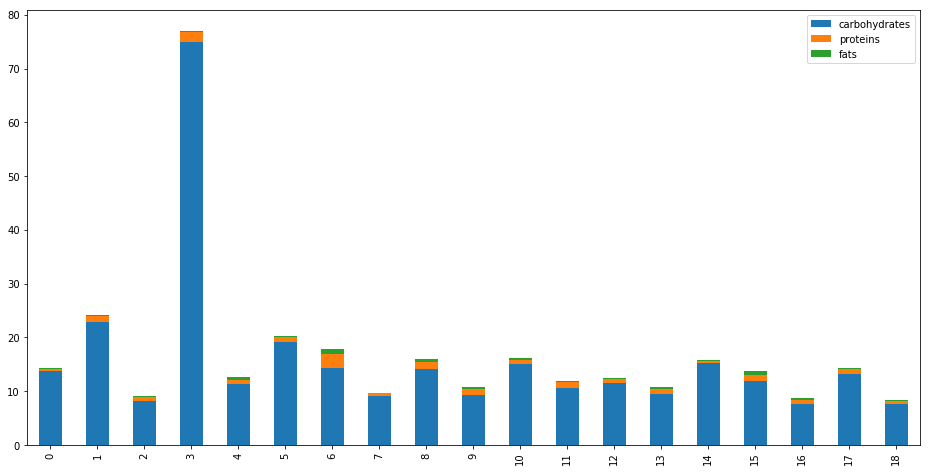

In [103]:
fruits.loc[:, 'carbohydrates':'fats'].plot(kind='bar', stacked=True, figsize=(16, 8)) # stacked

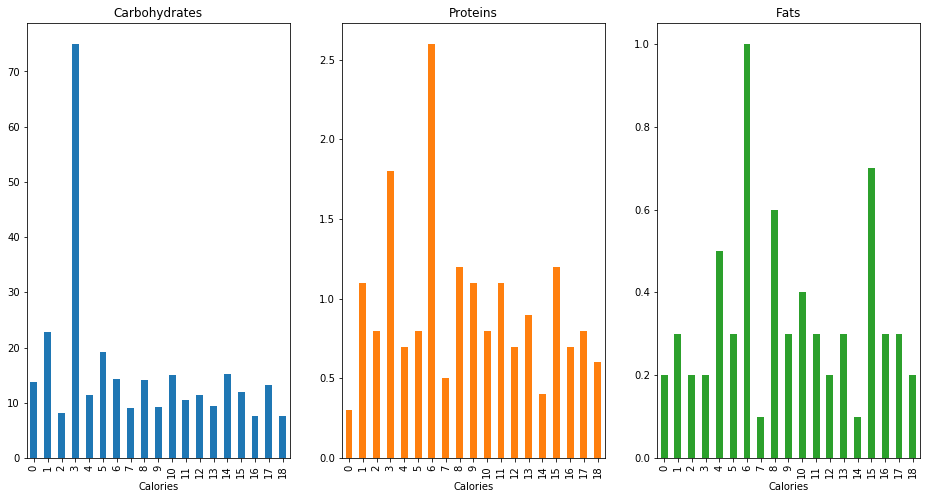

In [104]:
axs = (fruits.loc[:, 'carbohydrates':'fats']
    .plot(kind='bar', subplots=True, layout=(1,3), legend=False, figsize=(16, 8))) # subplots

axs[0][0].set_title('Carbohydrates')
axs[0][1].set_title('Proteins')
axs[0][2].set_title('Fats')

for ax in axs[0]:
    ax.set_xlabel('Fruit')
    ax.set_xlabel('Calories')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1199c14d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a22ac50>]], dtype=object)

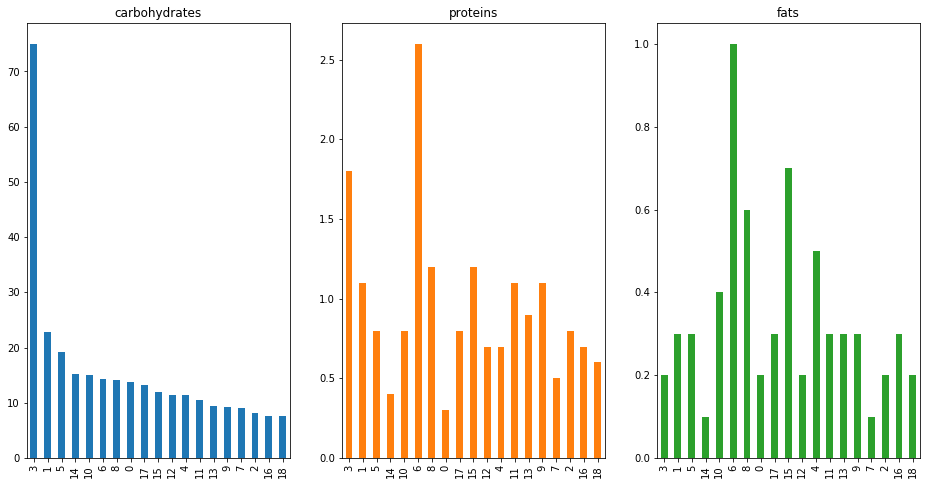

In [105]:
(fruits.loc[:, 'carbohydrates':'fats']
    .sort_values(by=['carbohydrates','proteins','fats'], ascending=False)
    .plot(kind='bar', subplots=True, layout=(1,3), legend=False, figsize=(16, 8))) # subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a43a1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a793250>]], dtype=object)

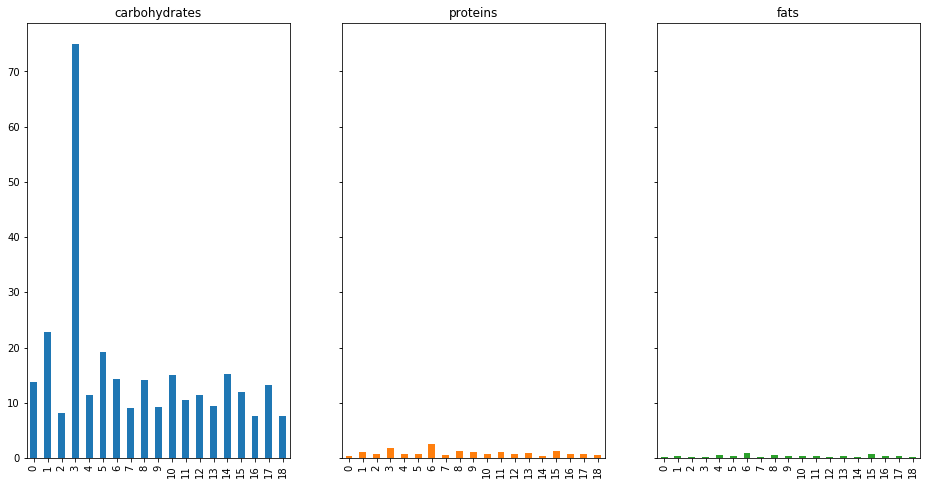

In [106]:
(fruits.loc[:, 'carbohydrates':'fats']
    .plot(kind='bar', subplots=True, sharey=True, layout=(1,3), legend=False, figsize=(16, 8))) # share the same vertical axis

## Handling Dates

In [107]:
tennis.date

0     2014-04-23
1     2014-07-12
2     2014-08-21
3     2014-10-12
4     2014-12-21
         ...    
9     2016-03-01
10    2016-05-11
11    2016-07-04
12    2016-11-21
13    2016-12-23
Name: date, dtype: object

In [108]:
tennis.date = pd.to_datetime(tennis.date)

In [109]:
tennis.date

0    2014-04-23
1    2014-07-12
2    2014-08-21
3    2014-10-12
4    2014-12-21
        ...    
9    2016-03-01
10   2016-05-11
11   2016-07-04
12   2016-11-21
13   2016-12-23
Name: date, dtype: datetime64[ns]

In [110]:
year = tennis.date.apply(lambda date: date.year)

year

0     2014
1     2014
2     2014
3     2014
4     2014
      ... 
9     2016
10    2016
11    2016
12    2016
13    2016
Name: date, dtype: int64

In [111]:
during_weekdays = tennis.date.apply(lambda date: np.is_busday(date))

during_weekdays

0      True
1     False
2      True
3     False
4     False
      ...  
9      True
10     True
11     True
12     True
13     True
Name: date, dtype: bool